<div style="text-align: right" align="right"><i>Peter Norvig, December 2024</i></div>

# Advent of Code 2024

I  enjoy doing the [**Advent of Code**](https://adventofcode.com/) (AoC) programming puzzles, so here we go for 2024!  Our old friend [@GaryJGrady](https://x.com/garyjgrady) is here to provide illustrations:

<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gdp709FW8AAq2_m?format=jpg&name=medium" width=400 alt="GaryJGrady cartoon"></a>

I traditionally start by loading up my [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook (same as last time except for the `current_year`):

In [2]:
%run AdventUtils.ipynb
current_year = 2024

print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


Each day's solution consists of three parts, making use of my `parse` and `answer` utilities:
- **Reading the day's input**. E.g. `pairs = parse(1, ints)`. 
- **Solving Part One**. Find the solution and record it with, e.g., `answer(1.1, 4, lambda: 2 + 2)`.
- **Solving Part Two**. Find the solution and record it with, e.g., `answer(1.2, 9, lambda: 3 * 3)`.

The function `parse` assumes that the input is a sequence of records (default one per line), each of which should be parsed in some way (default just left as a string, but the argument `ints` says to treat each record as a tuple of integers). The function `answer` records the correct answer (for regression testing), and records the run time (that's why a `lambda:` is used).

To fully understand each day's puzzle, and to follow along the drama involving Santa, the elves, the reindeer, the elephants, the Chief Historian, and all the rest, you need to read the descriptions on the [**AoC**](https://adventofcode.com/) site, as linked in the header for each of my day's solutions, e.g. [**Day 1**](https://adventofcode.com/2023/day/1) below.  I can't copy the content of AoC here, nor show my input files; you need to go to the site for that.

# [Day 1](https://adventofcode.com/2024/day/1) Historian Hysteria

According to the narrative, North Pole Historians created two lists of **location IDs**. We can parse them as a sequence of pairs of integers, and then use the transpose function, `T`, from my [AdventUtils](AdventUtils.ipynb) to get two lists of ID numbers:

In [5]:
left, right = location_ids = T(parse(1, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
38665   13337
84587   21418
93374   50722
68298   57474
54771   18244
49242   83955
66490   44116
65908   51323
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(38665, 13337)
(84587, 21418)
(93374, 50722)
(68298, 57474)
(54771, 18244)
(49242, 83955)
(66490, 44116)
(65908, 51323)
...


<img src="https://pbs.twimg.com/media/GdvPVOpXcAEZ34_?format=jpg&name=medium" width=400>

### Part 1: What is the total distance between your lists?

The **distance** between two numbers is the absolute value of their difference, and the **total distance** between two lists is the sum of the distances between respective pairs, where "respective" means to sort each list and then take the distance between the first element of each list, plus the distance between the second element of each list, and so on. (I use the transpose utility function, `T`, to turn the input sequence of 1000 pairs into two lists, each of 1000 integers.)

In [7]:
def total_distance(left: Ints, right: Ints) -> int:
    """Total distance between respective list elements, after sorting."""
    return sum(abs(a - b) for a, b in zip(sorted(left), sorted(right)))

In [8]:
answer(1.1, 1830467, lambda:
       total_distance(left, right))

Puzzle  1.1:   .000 seconds, answer 1830467           ok

### Part 2: What is their similarity score?

The **similarity score** is the sum of each element of the left list times the number of times that value appears in the right list.

In [10]:
def similarity_score(left: Ints, right: Ints) -> int:
    """The sum of each x in `left` times the number of times x appears in `right`."""
    counts = Counter(right)
    return sum(x * counts[x] for x in left)

In [11]:
answer(1.2, 26674158, lambda:
       similarity_score(left, right))

Puzzle  1.2:   .000 seconds, answer 26674158          ok

# [Day 2](https://adventofcode.com/2024/day/2): Red-Nosed Reports

Today's input is a sequence of **reports**, each of which is a sequence of integers:

In [13]:
reports = parse(2, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
74 76 78 79 76
38 40 43 44 44
1 2 4 6 8 9 13
65 68 70 72 75 76 81
89 91 92 95 93 94
15 17 16 18 19 17
46 47 45 48 51 52 52
77 78 79 82 79 83
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(74, 76, 78, 79, 76)
(38, 40, 43, 44, 44)
(1, 2, 4, 6, 8, 9, 13)
(65, 68, 70, 72, 75, 76, 81)
(89, 91, 92, 95, 93, 94)
(15, 17, 16, 18, 19, 17)
(46, 47, 45, 48, 51, 52, 52)
(77, 78, 79, 82, 79, 83)
...


### Part 1: How many reports are safe?

A report is **safe** if it is  monotonically strictly increasing or strictly decreasing, and if no difference between adjacent numbers is greater than 3 in absolute value.

In [15]:
def is_safe(report: Ints) -> bool:
    """A report is safe if all differences are either in {1, 2, 3} or in {-1, -2, -3}."""
    deltas = diffs(report)
    return deltas.issubset({1, 2, 3}) or deltas.issubset({-1, -2, -3})
    
def diffs(report: Ints) -> set:
    """The set of differences between adjacent numbers in the report."""
    return {report[i] - report[i - 1] for i in range(1, len(report))}

assert diffs((7, 6, 4, 2, 1)) == {-1, -2}
assert is_safe((7, 6, 4, 2, 1))  == True

In [16]:
answer(2.1, 257, lambda:
       quantify(reports, is_safe))

Puzzle  2.1:   .000 seconds, answer 257               ok

### Part 2: How many reports are safe using the Problem Dampener?

The **problem dampener** says that a report is safe if you can drop one element and get a safe report.

In [18]:
def is_safe_with_dampener(report: Ints) -> bool:
    """Is there any way to drop one element of `report` to get a safe report?"""
    return any(map(is_safe, drop_one(report)))

def drop_one(report) -> Iterable:
    """All ways of dropping one element of the input report."""
    return (report[:i] + report[i + 1:] for i in range(len(report)))

assert set(drop_one('1234')) == {'234', '134', '124', '123'}

In [19]:
answer(2.2, 328, lambda:
       quantify(reports, is_safe_with_dampener))

Puzzle  2.2:   .002 seconds, answer 328               ok

# [Day 3](https://adventofcode.com/2024/day/3): Mull It Over

Today's input is a computer program with some corrupted characters. The program has multiple lines, but lines don't matter, so I will concatenate them into one big string:

In [21]:
program = cat(parse(3))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 6 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
where(536,162)~'what()what()how(220,399){ mul(5,253);mul(757,101)$where()@why()who()&when()from( ...
}?~who()select()-mul(316,505)&%*how()mul(363,589)>?%-:)where()~{{mul(38,452)select()%>[{]%>%mul( ...
?>where(911,272)'mul(894,309)~+%@#}@#why()mul(330,296)what()mul(707,884)mul;&}<{>where()$why()]m ...
> (when()[where()/#!/usr/bin/perl,@;mul(794,217)select():'])select()mul(801,192)why()&]why()/:]* ...
,+who():mul(327,845)/ >@[>@}}mul(86,371)!~&&~how(79,334)mul(637,103)why()mul(358,845)-#~?why(243 ...
where()#{*,!?:$mul(204,279)what()!{ what()mul(117,94)!select()>:mul(665,432)#don't()!!<!? mul(50 ...


<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gd5ZSI9XEAAAzQh?format=jpg&name=small" width=400 alt="GaryJGrady cartoon"></a>


### Part 1: What do you get if you add up all of the results of the multiplications?

For Part 1, just look for instructions of the form "mul(*digits*,*digits*)", using a regular expression and `re.findall`. Perform each of these multiplications and add them up, and ignore all other characters/instructions:

In [23]:
def execute(program: str) -> int:
    """The sum of the results of the multiply instructions."""
    return sum(prod(ints(m)) for m in re.findall(multiplications, program))

multiplications = r'mul\(\d+,\d+\)'

In [24]:
answer(3.1, 156388521, lambda: 
       execute(program))

Puzzle  3.1:   .001 seconds, answer 156388521         ok

### Part 2: What do you get if you add up all of the results of just the enabled multiplications?

For Part 2, the instruction "don't()"  says to disable (ignore) following multiply instructions until a "do()" instruction enables them again. I will define the function `enabled`, which returns the part of the program that is enabled, by susbstituting a space for the "don't()...do()" sequence.

In [26]:
def enabled(program: str) -> str:
    """Just the part of the program that is enabled; remove "don't()...do()" text."""
    return re.sub(r"don't\(\).*?(do\(\)|$)", " ", program)

In [27]:
answer(3.2, 75920122, lambda:
       execute(enabled(program)))

Puzzle  3.2:   .000 seconds, answer 75920122          ok

# [Day 4](https://adventofcode.com/2024/day/4): Ceres Search

Today's puzzle is a 2D word-search puzzle:

In [29]:
xmas_grid = Grid(parse(4))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
MASAMXMSSXXMAMXXMXMASXMASXMMSMSMMMAXMASASMMSSMSXAXMASMMSMMMSSMSASMSSSSMSMSMXXMXMAXAMXMSMSSXSAMXM ...
MASMMXMASAXASMSMMMSAMXSMSAMXAAAAAXAMXASXAMAAAAMMSMMMMMASXAAAAMMAMAMMASAAAAXMXMSSSSSSMMSAMAXAXXSM ...
MMXAXMMMSXMAMAAXAAXAAAXXSMMSMSMSMXAXMXSMMMMSSMXAMXAAXMAMMMMSSMMAMAMMAMMMMMXSAAXAAMMAXXSAMXMSMAXM ...
SXSAMASASMSXMSMSMSSMMMMMMXAMXMMXMASMMMMAXXAAAMMMSSSSSMASXXAAXASMSXXMXSXSXSASMSMMSMSAMMMAMXAAMASX ...
AAAXXXMASASXMXMAXXMMASAASMXSASASXAAAAMSSMMMSXMAAMMMMMXAXMMMMSAMXAMASAMXSAMASXXAXAAMAMXSAMXSXSMMA ...
MSMMXXMMMAMAMMMMMMXSAXXAMMMMXSAXMMXXAMXAAMMXMASXMAAASMMXAAMXAXAMMMAMAMAMAMXMASXMMXMAAXMAXMAMXMSA ...
MXAXAMXXMMMMSAMAASMMMSMMASASAMAMAXMSXMSMMXAMXAXMMSSXSASXSSSMAMSMXMXSAMSSSMAMXMXAMAXXMMSAXAXMMXMA ...
ASXMMXSAMXAASXXMXSAAAXASAMMMASMSSSMAAMMXMMSSMASAMAMMMAMMAXMAXMASXM

### Part 1: How many times does XMAS appear?

We just have to find how many times the word "XMAS" appears in the grid, horizontally, vertically, or diagonally, forwards or backwards.  The variable `directions8` contains those eight directions (as (delta-x, delta-y) pairs). So examine each square of the grid and if it contains "X", see in how many of the directions it spells "XMAS". (Note that locations in the grid are denoted by `(x, y)` coordinates, as are directions (e.g., `(1, 0)` is the `East` direction. The functions `add` and `mul` do addition and scalar multiplication on these vectors.)

In [31]:
def word_search(grid: Grid, word='XMAS') -> int:
    """How many times does the given word appear in the grid?"""
    return quantify(grid_can_spell(grid, start, dir, word) 
                    for start in grid 
                    if grid[start] == word[0]
                    for dir in directions8)

def grid_can_spell(grid, start, dir, word):
    """Does `word` appear in grid starting at `start` and going in direction `dir`?"""
    return all(grid[add2(start, mul(dir, i))] == word[i] for i in range(len(word)))

In [32]:
answer(4.1, 2401, lambda:
       word_search(xmas_grid))

Puzzle  4.1:   .033 seconds, answer 2401              ok

### Part 1: How many times does an X-MAS appear?

Upon further review, the goal is not to find "XMAS" byt rather X-"MAS"; that is, two "MAS" words in an X pattern. The pattern can be any of these four:

     M.S     S.M     M.M     S.S
     .A.     .A.     .A.     .A.
     M.S     S.M     S.S     M.M

I decided to find these by first looking for each the middle letter ("A") in the grid, and then, for each "A" and for each of the four pairs of diagonal directions, see if the target word ("MAS") can be spelled in both directions:

In [34]:
diagonal_pairs = ([SE, NE], [SW, NW],  [SE, SW], [NE, NW])

def x_search(grid: Grid, word='MAS') -> int:
    """How many times does an X-MAS appear in the grid?"""
    return quantify((grid_can_spell(grid, sub(mid_pos, dir1), dir1, word) and
                     grid_can_spell(grid, sub(mid_pos, dir2), dir2, word))
                    for mid_pos in grid if grid[mid_pos] == word[1]
                    for dir1, dir2 in diagonal_pairs)

In [35]:
answer(4.2, 1822, lambda:
       x_search(xmas_grid))

Puzzle  4.2:   .027 seconds, answer 1822              ok

# [Day 5](https://adventofcode.com/2024/day/5): Print Queue

Today's puzzle involves a **sleigh launch safety manual** that needs to be updated. The day's input is in two sections: the first a set of **rules** such as "47|53", which means that page 47 must be printed before page 53; and the second a list of **updates** of the form "75,47,61,53,29", meaning that those pages are to be printed in that order.

<img src="https://pbs.twimg.com/media/GeEU0XgWAAARMw-?format=jpg&name=medium" width=400>

I mostly like my `parse` function, but I admit it is not ideal when an input file has two sections like this. I'll parse the two sections as paragraphs, and then call `parse` again on each paragraph:

In [37]:
manual  = parse(5, sections=paragraphs)
rules   = set(parse(manual[0], ints))
updates = parse(manual[1], ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1366 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
14|39
14|53
85|19
85|25
85|61
85|35
85|58
74|86
 ...
61,58,51,32,12,14,71
58,25,54,14,12,94,32,76,39
35,53,26,77,14,71,25,76,85,55,51,49,95
32,91,76, ...


In [38]:
assert (48, 39) in rules # `rules` is a set of (earlier, later) page number pairs
assert updates[0] == (61, 58, 51, 32, 12, 14, 71) # `updates` is a sequence of page number tuples

### Part 1: What do you get if you add up the middle page number from the correctly-ordered updates?

I'll define `is_correct` to determine if an update is in the correct order, and `sum_of_correct_middles` to add up the middle numbers of the correct updates:

In [40]:
def sum_of_correct_middles(rules: Set[Ints], updates: Tuple[Ints]) -> int:
    """The sum of the middle elements of each update that is correct."""
    return sum(middle(update) for update in updates if is_correct(update, rules))

def is_correct(update: Ints, rules: Set[Ints]) -> bool:
    """An update is correct if no pair of pages violates a rule in the rules set."""
    return not any((second, first) in rules for (first, second) in combinations(update, 2))

def middle(sequence) -> object: return sequence[len(sequence) // 2]

In [41]:
answer(5.1, 5762, lambda:
       sum_of_correct_middles(rules, updates))

Puzzle  5.1:   .001 seconds, answer 5762              ok

### Part 2: What do you get if you add up the middle page numbers after correctly re-ordering the incorrect updates?

In Part 2 we have to find the incorrect updates, re-order them into a correct order, and again sum the middle page numbers.
Since I have already defined `is_correct`, i could just generate all permutations of each update and find one that `is_correct`. That would work great if the longest update consists of only 5 pages, as it does in the example input. But what is the longest update in the actual input?

In [43]:
max(map(len, updates))

23

That's not great. With 23 numbers there are 23! permutations, which is over 25 sextillion. So instead, here's my strategy:

- `sum_of_corrected_middles` will find the incorrect rules, perform a correction on each, and sum the middle numbers.
- `correction` will sort an update, obeying the rules. It used to be that Python's `sort` method allowed a `cmp` keyword to compare two values; there is vestigial support for this with the `functools.cmp_to_key` function. I will **sort** each update so that page *m* comes before page *n* if (*m*, *n*) is in the rules.
- Sorting will be BOUT a sextillion times faster than enumerating permutations.

In [45]:
def sum_of_corrected_middles(rules, updates) -> int:
    """The sum of the middle elements of each update that is correct."""
    incorrect = [update for update in updates if not is_correct(update, rules)]
    corrected = [correction(update, rules) for update in incorrect]
    return sum(map(middle, corrected))
    
def correction(update: Ints, rules) -> Ints:
    """Reorder the update to make it correct."""
    def rule_lookup(m, n): return +1 if (m, n) in rules else -1 
    return sorted(update, key=functools.cmp_to_key(rule_lookup))

In [46]:
answer(5.2, 4130, lambda:
       sum_of_corrected_middles(rules, updates))

Puzzle  5.2:   .001 seconds, answer 4130              ok

I have to say, I'm pleased that this day I got both parts right with no errors (and in fact, the same for the previous days). I was worried I might have my `+1` and `-1` backwards in `cmp_to_key`, but so far, everything has gone smoothly. (However, even if I started solving the second the puzzles are released (which I don't), I wouldn't show up on the leaderboard;  I'm still *way* slower than the skilled contest programmers.

# [Day 6](https://adventofcode.com/2024/day/6): Guard Gallivant

Today's input is a 2D map of the manufacturing lab, with "`.`" indicating an empty space, "`#`" indicating an obstruction, and "`^`" indicating the position of the security guard.

In [49]:
lab_grid = Grid(parse(6))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 130 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
........#........................................#......#........#.............................. ...
....................................#......#.....#............#.............#..........#........ ...
......................#.......................................................#................. ...
.......#..#..#....#...#...#....#..............#......#.......#...#................#.......#..... ...
......................#....##...#.......#....#.......................................#.......... ...
...#............................#........................................#...................... ...
....................#............#...............#......#.........#...........#................. ...
............................#......#...#................#.........

### Part 1: How many distinct positions will the guard visit before leaving the mapped area?

The guard follows this protocol: If there is something directly in front of you, turn right 90 degrees.
Otherwise, take a step forward.

I'll define `follow_path` to output a list of all the positions the guard occupies. I realize the puzzle is only asking for a count of the positions, but the path might be useful for Part 2, or for debugging, so I'll return it. I worried that it is also possible for a path to become a loop, but the problem statement says that can't happen, so I won't test for it.

In [51]:
def follow_path(grid: Grid, guard='^', facing=North) -> List[Point]:
    """A list of all points in the path followed by the guard."""
    path = grid.findall(guard) # A one-element list of positions, e.g. [(3, 4)]
    while (ahead := add2(path[-1], facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
        else:
            path.append(ahead)
    return path

In [52]:
answer(6.1, 5329, lambda: 
       len(set(follow_path(lab_grid))))

Puzzle  6.1:   .002 seconds, answer 5329              ok

I initially had a **bug**; I asked for the length of the path, not the length of the **set** of positions in the path.
                                  
### Part 2: How many different positions could you choose for an obstruction to put the guard in a loop?

The historians would like to place a single obstacle so that the guard *will* get stuck in a loop, rather than exiting the grid. They want to know all possible positions for the obstacle. What do we know about such positions?
- An obstacle  position must be somewhere on the guard's path, otherwise it would have no effect.
- The instructions say it can't be the guard's initial position.
- A loop is when the guard's path returns to the same position with the same facing. This suggests that my Part 1 solution was not completely helpful: to find duplicate positions in the path I would need a set of position/facing pairs, not just positions.
- I can make slightly less work by only storing the corners of the path: the places where the guard turns. 
- The simplest approach for finding obstacle positions is to temporarily place an obstacle on each point on the path, one at a time, and see if it leads to a loop.
- There are 5,329 positions on the path, so the runtime should be about 5,000 times longer than Part 1; on the order of 10 seconds or so. I'll try it, and if it seems too slow, I'll try to think of something better.

In [54]:
def is_loopy_path(grid: Grid, guard_pos, facing=North) -> bool:
    """Does the path followed by the guard form a loop?"""
    path = {(guard_pos, facing)}
    while (ahead := add2(guard_pos, facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
            if (guard_pos, facing) in path:
                return True
            path.add((guard_pos, facing))
        else:
            guard_pos = ahead
    return False
    
def find_loopy_obstacles(grid: Grid) -> Iterable[Point]:
    """All positions in which placing an obstacle would result in a loopy path for the guard."""
    guard_pos = the(grid.findall('^'))
    for pos in set(follow_path(grid)) - {guard_pos}:
        grid[pos] = '#' # Temporarily place an obstacle 
        if is_loopy_path(grid, guard_pos):
            yield pos
        grid[pos] = '.' # Remove the obstacle

In [55]:
answer(6.2, 2162, lambda:
       quantify(find_loopy_obstacles(lab_grid)))

Puzzle  6.2:  1.968 seconds, answer 2162              ok

That was a bit slow, but I'll take it. I had a **bug** when I was keeping a set of previously visited states to detect loops; the bug went away when I switched to the step-count limit.

# [Day 7](https://adventofcode.com/2024/day/7): Bridge Repair

The narrative for today involves fixing a bridge, and each line of our input represents a calibration equation for the bridge. Unfortunately, some nearby elephants stole all the operators from the equations, so all that is left are the integers:

In [58]:
equations = parse(7, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 850 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
202998336: 686 9 7 62 2 673
19275222: 361 3 7 170 65 5 223
23101: 7 694 916 4 6
2042426: 6 34 2 423 3
40369523: 8 880 91 45 23
46629044796: 990 471 4 4 796
1839056: 3 42 2 4 3 258 703 4 8
26205: 2 9 5 9 9 4 3 7 44 5 8 7
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 850 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(202998336, 686, 9, 7, 62, 2, 673)
(19275222, 361, 3, 7, 170, 65, 5, 223)
(23101, 7, 694, 916, 4, 6)
(2042426, 6, 34, 2, 423, 3)
(40369523, 8, 880, 91, 45, 23)
(46629044796, 990, 471, 4, 4, 796)
(1839056, 3, 42, 2, 4, 3, 258, 703, 4, 8)
(26205, 2, 9, 5, 9, 9, 4, 3, 7, 44, 5, 8, 7)
...


<img src="https://pbs.twimg.com/media/GeOKVYiX0AAwNMy?format=jpg&name=medium" width=400> 

### Part 1: What is the total calibration result of possibly true equations?

Our task is to find operators to balance each equation. The input "`3267: 81 40 27`" can be made into the equation "`3267 = 81 + 40 * 27`", with the understanding that all evaluations are done left-to-right, so this is "`3267 = ((81 + 40) * 27)`". The two allowable operators are addition and multiplication. Our task is to compute the sum of all the equations that can be balanced.

The straightforward approach is to try both operators on every number. If there are *n* numbers in an equation then there will be 2<sup>*n*-2</sup> possible equations; is that going to be a problem?

In [61]:
max(map(len, equations))

13

No problem! With 13 numbers on a line there are 2<sup>11</sup> = 2048 equations; a small number.  I'll define `can_be_calibrated` to keep a set of `results`, updating the set for each new number and each possible operator. Although the instructions were a bit vague, it appears that when they talk about "numbers" in the equations they mean "positive integers". That means that neither addition nor multiplication can cause a number to decrease, so once a result exceeds the target, we'll drop it.

In [63]:
def can_be_calibrated(numbers: ints, operators=(operator.add, operator.mul)) -> bool:
    """Can the tuple of numbers be calibrated as a correct equation using '+' and '*' ?"""
    target, first, *rest = numbers
    results = {first} # A set of all possible results of the partial computation
    for y in rest:
        results = [op(x, y) for x in results if x <= target for op in operators]
    return target in results

In [64]:
answer(7.1, 1985268524462, lambda:
    sum(numbers[0] for numbers in equations if can_be_calibrated(numbers)))

Puzzle  7.1:   .014 seconds, answer 1985268524462     ok

### Part 2: What is the total calibration result of possibly true equations, allowing concatenation?

In Part 2, we add a third operator: concatentation. The equation "`192: 17 8 14`" can be balanced by concatenated 17 and 8 to get 178, and then adding 14: "`192 = ((17 || 8) + 14)`". With three operators, the equation with 11 operators now has 3<sup>11</sup> = 177,147 possibilities, almost 100 times more than Part 1, so this will take a few seconds:

In [66]:
operators3 = (operator.add, operator.mul, lambda x, y: int(str(x) + str(y)))    

In [67]:
answer(7.2, 150077710195188, lambda:
       sum(numbers[0] for numbers in equations if can_be_calibrated(numbers, operators3)))

Puzzle  7.2:   .801 seconds, answer 150077710195188   ok

That was easy, but it is the second-slowest runtime so far. I can make it a wee bit faster:

In [69]:
operators3 = (operator.add, operator.mul, lambda x, y: x * 10 ** num_digits(y) + y)

def num_digits(n: int) -> int:
    """The number of digits in a positive integer."""
    result = 1
    while n >= 10:
        result += 1
        n /= 10
    return result

In [70]:
answer(7.2, 150077710195188, lambda:
       sum(numbers[0] for numbers in equations if can_be_calibrated(numbers, operators3)))

Puzzle  7.2:   .656 seconds, answer 150077710195188   ok

# [Day 8](https://adventofcode.com/2024/day/8): Resonant Collinearity

Another grid input, this one a map of antenna locations. Each different non-"`.`" character denotes an antenna of a given frequency.

In [72]:
antennas = Grid(parse(8))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 50 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
..................................................
.................................C................
.e..........7O....................................
.....................................z............
......................t.........C.......k.........
............h................................9....
.............5.7....O.............9C..............
.......5.O................T.......................
...


### Part 1: How many unique locations within the bounds of the map contain an antinode?

An **antinode** occurs at a point that is perfectly in line with two antennas of the same frequency, but only when one of the antennas is twice as far away as the other.

That means that if two antennas are at points *A* and *B*, then the two antinodal points are at 2*A* - *B* and 2*B* - A. If there are three or more antennas with the same frequency then we consider each pair of them in turn. So all we have to do is group the antennas by frequency, compute the antinodes for each pair with the same frequency, and determine which of those antinodal points are on the grid.

In [74]:
def antinodes(antennas: Grid) -> Set[Point]:
    """The set of all antinodal points in the grid.
    (That is, points that are of distance d and 2d from same frequency antennas.)"""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of antinodal points for two antenna points, A and B."""
    return {P for P in {sub(mul(A, 2), B), sub(mul(B, 2), A)}
              if P in antennas}

In [75]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .003 seconds, answer 220               ok

### Part 2: How many unique locations within the bounds of the map contain an updated antinode?

For Part 2, the updated definition of antinodes means that they can now occur at *any* point that is exactly on line with two antennas of the same frequency, regardless of distance. So if the two antennas are *A* and *B* then the antinodal points can be found by starting at *A* and going step by step in the direction of the vector *A* - *B* and also in the direction *B* - *A*, going as far as you can while staying on the grid. The `Grid.follow_line` method facilitates that.

I'll parametrize `updated_antinodes` so it can handle both parts:

In [77]:
def antinodes(antennas: Grid, antinodes2=antinodes2) -> Set[Point]:
    """The set of all updated antinodal points in the grid.
    (That is, points that are on a line with two same frequency antennas.)"""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def updated_antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of updated antinodal points for two antenna points, A and B."""
    return (set(antennas.follow_line(A, sub(A, B))) | 
            set(antennas.follow_line(A, sub(B, A))))

In [78]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .003 seconds, answer 220               ok

In [79]:
answer(8.2, 813, lambda:
       len(antinodes(antennas, updated_antinodes2)))

Puzzle  8.2:   .003 seconds, answer 813               ok

I got both of these right the first time (except for some simple typos: a mismatched paren and typing `grid` when I meant the grid called `antennas`).

# [Day 9](https://adventofcode.com/2024/day/9): Disk Fragmenter

Today we're confronted with a computer disk that needs to be compressed to gain some contiguous free space. The contents of the disk is represented in the **disk map** format: a string of digits, where the digits alternate between the number of blocks of a file, followed by the number of blocks of free space. We'll parse that as a tuple of digits:

In [82]:
disk_map = the(parse(9, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
692094513253604282899448234539616972499153261626907217394161512944107098953354935354419233821564 ...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(6, 9, 2, 0, 9, 4, 5, 1, 3, 2, 5, 3, 6, 0, 4, 2, 8, 2, 8, 9, 9, 4, 4, 8, 2, 3, 4, 5, 3, 9, 6, 1, ...


<img src="https://pbs.twimg.com/media/GeYt7iuWIAAHxhT?format=jpg&name=medium" width=400>

### Part 1: Compress the hard drive. What is the resulting filesystem checksum? 

The disk map "`12345`" means that there is 1 block for the first file (which has ID number 0), followed by 2 empty blocks, then 3 blocks for the second file (with ID number 1), followed by 4 empty blocks, and finally 5 blocks for the third file (with ID number 2).  It makes sense to convert this into a **disk layout** format, which would be "`0..111....22222`", where "`.`" represents an empty block.

To **compress** a disk layout, move file blocks one at a time starting by taking the rightmost non-empty block and moving it to the leftmost empty position; repeat until no more moves are possible.

The final answer is a **checksum** of the compressed disk: the sum of the product of the block position times the file ID number for all non-empty blocks.

In [84]:
empty = '.'

def disk_layout(disk_map: Ints) -> list:
    """Convert a disk map into a disk layout."""
    def empties(i): return (disk_map[i] * [empty] if i < len(disk_map) else [])
    return append(disk_map[i] * [id] + empties(i + 1)
                  for id, i in enumerate(range(0, len(disk_map), 2)))

def compress_layout(layout: list) -> list:
    """Mutate layout by moving blocks one at a time from the end to the leftmost free space."""
    N    = len(layout)
    free = -1  # Start looking for free space from the left
    end  = N   # Start looking for non-empty blocks from the right
    while True:
        free = first(i for i in range(free + 1, N)    if layout[i] is empty)
        end  = first(i for i in range(end - 1, 0, -1) if layout[i] is not empty)
        if free is None or free >= end:
            return layout
        layout[free], layout[end] = layout[end], empty

def checksum(layout: list) -> list:
    """The sum of the product of the block position times the file ID number for all non-empty blocks."""
    return sum(i * id for i, id in enumerate(layout) if id is not empty)

In [85]:
answer(9.1, 6332189866718, lambda:
       checksum(compress_layout(disk_layout(disk_map))))

Puzzle  9.1:   .020 seconds, answer 6332189866718     ok

### Part 2: Compress the hard drive with the new method. What is the resulting filesystem checksum? 

In Part 2, there is a new method of compressing the disk, where we move full files rather than a block at a time. Again we start on the right, and try to move a file to the leftmost position where it will fit. If there is no such position, the file doesn't move. `compress_layout2`  implements this new method, performing a move by swapping two [**slices**](https://docs.python.org/3/library/functions.html#slice) of the disk layout: 

    layout[file], layout[free] = layout[free], layout[file]`

To find all the slices that indicate files, it is easier to run through the disk map than the disk layout. The function `file_slices` quickly finds all such slices.

Finding a free space for a file is more difficult, because we need to find one that is big enough. I'll run through the whole layout from left-to-right each time. This will make it *O*(*n*<sup>2</sup>) rather than *O*(*n*), but hopefully it won't be too slow. (If I wanted to speed it up I could have an array of starting positions for each desired size of free space.)

In [87]:
def compress_layout2(disk_map: Ints) -> list:
    """Mutate layout by moving files one at a time from the end to the leftmost free space."""
    layout = disk_layout(disk_map)
    for file in file_slices(disk_map):
        if free := find_freespace(layout, file):
            layout[file], layout[free] = layout[free], layout[file]
    return layout

def file_slices(disk_map: Ints) -> List[slice]:
    """Given a disk map, find all the slice positions of files in the disk layout (last one first)."""
    slices = []
    block = 0
    for i, length in enumerate(disk_map):
        if i % 2 == 0:
            slices.append(slice(block, block + length))
        block += length
    slices.reverse()
    return slices

def find_freespace(layout, file_slice) -> Optional[slice]:
    """Find a slice position big enough to fit the given file slice, or return None if there is no position."""
    length = file_slice.stop - file_slice.start
    run = 0
    for i in range(layout.index(empty), len(layout)):
        if i >= file_slice.start:
            return None # We only want to move a file left, not right
        elif layout[i] is empty:
            run += 1
            if run == length:
                return slice(i + 1 - length, i + 1)
        else:
            run = 0
    return None

In [88]:
answer(9.2, 6353648390778, lambda:
       checksum(compress_layout2(disk_map)))

Puzzle  9.2:  2.731 seconds, answer 6353648390778     ok

I got the right answer, but I confess I had an off-by-one **bug** in `find_freespace` on the first try.

# [Day 10](https://adventofcode.com/2024/day/10): Hoof It

Today's input is a topological map, with digits indicating the elevation of each terrain position.

In [91]:
topo = Grid(parse(10, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 60 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
432109865210212123765432101234321098543289654320132112121058
045678774324301012892343023445456787650198763013241001034569
187678789465692321001056014896234986456787012894653212123678
296589921056789433217837895687145675323891233765784589238987
345437835434576544786921278761010014210710321212098676521067
032126546323465435695430789760121223121653450303145125430678
123010567810156543212345699859834321056544067654236012321589
543213498987657665401030787348765430187432198765987622345432
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 60 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(4, 3, 2, 1, 0, 9, 8, 6, 5, 2, 1, 0, 2, 1, 2,

### Part 1: What is the sum of the scores of all trailheads on your topographic map?

A **trailhead** is any position with elevation  0, and a **peak** is any position with elevation 9. The **score** of a trailhead is the number of peaks that can be reached by following a path where each step increases the elevation by exactly 1. All moves are in one of the four cardinal directions (north/south/east/west).

I'll keep a set of points on the frontier of possible paths, updating this set on each iteratation from 1 to 9, by looking at each point on the frontier and seeing which of the neighboring points `p` have the right elevation:

In [93]:
def score(topo: Grid, trailhead: Point) -> int:
    """How many peaks can be reached from this trailhead?"""
    frontier = {trailhead}
    for elevation in range(1, 10):
        frontier = {p for p in union(map(topo.neighbors, frontier))
                    if topo[p] == elevation}
    return len(frontier)

In [94]:
answer(10.1, 744, lambda:
       sum(score(topo, head) for head in topo.findall([0])))

Puzzle 10.1:   .005 seconds, answer 744               ok

### Part 2: What is the sum of the ratings of all trailheads?

The **rating** of a trailhead is the number of distinct paths from the trailhead to a peak.

As in Part 1, I'll keep a frontier and update it on each iteration from 1 to 9, but this time the frontier will be a counter of `{position: count}` where the count indicates the number of paths to that position. On each iteration I'll look at each point `f` on the frontier and see which of the neighboring points `p` have the right elevation, and increment the counts for those points by the count for `f`. This approach is linear in the number of positions, whereas if I followed all possible paths depth-first there could be an exponential number of paths.

In [96]:
def rating(topo: Grid, trailhead: Point) -> int:
    """How many distinct paths are there from this trailhead to any peak?"""
    frontier = Counter({trailhead: 1})
    for elevation in range(1, 10):
        frontier = accumulate((p, frontier[f]) 
                              for f in frontier
                              for p in topo.neighbors(f) if topo[p] == elevation)
    return sum(frontier.values())

In [97]:
answer(10.2, 1651, lambda:
       sum(rating(topo, head) for head in topo.findall([0])))

Puzzle 10.2:   .006 seconds, answer 1651              ok

Today I went pretty fast (for me); I started a few minutes late and finished in 15 minutes. From the point of view of a competitive coder I did foolish things like write docstrings and use variables of more than one letter, so while this time was fast for me, it placed well out of the top 1000.

Here's a visualization of the map:

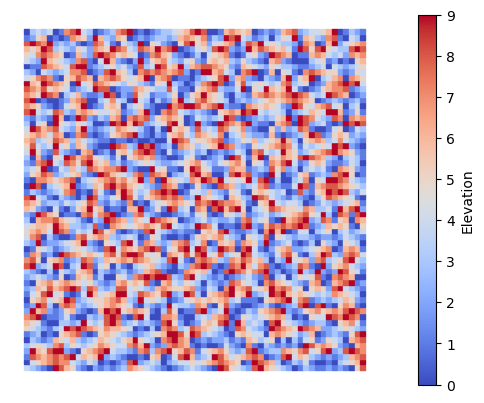

In [99]:
def plot_topo(topo: Grid):
    """Show the map with a colormap from blue to red."""
    plt.figure()
    scatter = plt.scatter(Xs(topo), Ys(topo), c=list(topo.values()), 
                          cmap='coolwarm', marker='s', s=12)
    plt.colorbar(scatter, label='Elevation')
    plt.axis('square')
    plt.axis('off')

plot_topo(topo)

# [Day 11](https://adventofcode.com/2024/day/11): Plutonian Pebbles

Today's narrative involves a straight line of stones, each of which has a number enscribed on it. The input is a single line of these numbers:

In [101]:
stones = the(parse(11, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
0 27 5409930 828979 4471 3 68524 170
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(0, 27, 5409930, 828979, 4471, 3, 68524, 170)


### Part 1: How many stones will you have after blinking 25 times?

Every time you blink, the stones appear to change, according to these rules:
- A stone marked 0 changes to 1.
- Otherwise, a stone with an even number of digits splits into two stones, with the first and second halves of those digits.
- Otherwise, the stone's number is multiplied by 2024.

<img src="https://pbs.twimg.com/media/GejUQBgWIAAUtDf?format=jpg&name=medium" width=400>


I'll define `blink` to simulate the effect of a given number of blinks, and `change_stone` to change a single stone, returning a list of wither one or two stones (the two stones computed by `split_stone`):

In [103]:
def blink(stones: Ints, blinks=25) -> List[int]:
    """Simulate the changes in the list of stones after blinking `blinks` times."""
    for _ in range(blinks):
        stones = append(map(change_stone, stones))
    return stones
    
def change_stone(stone: int) -> List[int]:
    """Change a single stone into one or two, according to the rules."""
    digits = str(stone)
    return ([1]                 if stone == 0           else
            split_stone(digits) if len(digits) % 2 == 0 else
            [stone * 2024])

def split_stone(digits: str) -> List[int]:
    """Split a stone into two halves."""
    half = len(digits) // 2
    return [int(digits[:half]), int(digits[half:])]

In [104]:
answer(11.1, 194482, lambda:
       len(blink(stones)))

Puzzle 11.1:   .068 seconds, answer 194482            ok

### Part 2: How many stones would you have after blinking a total of 75 times?

It looks like the number of stones is roughly doubling every 1 or 2 blinks, so for 75 blinks we could have trillions of stones. I'd like something more efficient. I note that:
- Although the puzzle makes it clear that the stones are in a line, it turns out their position in the line is irrelevant.
- Because all the even-digit numbers get split in half, it seems like many small numbers will appear multiple times.
- (In the given example, after 6 blinks the number 2 appears 4 times.)
- Therefore, I'll keep a `Counter` of stones rather than a `list` of stones.

In [106]:
def blink2(stones: Ints, blinks=25) -> Counter:
    """Simulate the changes after blinking `blinks` times and return a Counter of stones."""
    counts = Counter(stones)
    for _ in range(blinks):
        counts = accumulate((s, counts[stone]) 
                            for stone in counts 
                            for s in change_stone(stone))
    return counts

Now we can re-run Part 1 (it should be slightly faster), and run Part 2 without fear of having trillion-element lists:

In [108]:
answer(11.1, 194482, lambda:
       total(blink2(stones, 25)))

Puzzle 11.1:   .002 seconds, answer 194482            ok

In [109]:
answer(11.2, 232454623677743, lambda:
       total(blink2(stones, 75)))

Puzzle 11.2:   .060 seconds, answer 232454623677743   ok

Again, I did pretty well, with no errors, and moving at what I thought was a good pace, but I didn't even crack the top 2000 on the leaderboard. I guess I spent too much time writing docstrings and type hints, and refactoring as I went.

# [Day 12](https://adventofcode.com/2024/day/12): Garden Groups

Today's input is yet another 2D map. This one depicts different garden plots on a farm, each plot planted with a crop, indicated by a letter (maybe "I" is iceberg lettuce and "U" is udo, and so on):

In [112]:
farm = Grid(parse(12))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
IIIIIIIIIIIIIIIIIIIIIUUUUUUUUJLLLLAAAAAAMMMAUUUUPPXPZZZZZZZZZZZXXXXXXXXXXXXXXXXXXXXXFFFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJALEAAAAAAAAAAAAUUUUPXPPZZZZZHHHHHHXHXXXXXXXXXXXXXXXXXXFXFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJAAAAAAAAAAAAAAUUPPPPPPPZZZZZZZHHHHHHHXXXXXXXXXXXXXXXXXXXFFFFFFFFFZ ...
IIIIIIIIIIIAAIIIIIIIIIUUUUUUUJJAAAAAAAAAAAAAAVVPPPPPPPPZHHHHHHHHHHHXXXXXXXXXXXXXXXXXFFFFFFFFFFFZ ...
IOOIIIIIIIIAAIIIIIIIIIIUUUQVUJJAAAAAAAAAAAAAEVVZPPPPPPPHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXFFFFFFLLL ...
OOOOOOOOIIAAAAAIIIIIIIIUQQQQVQJAAAAAAAAAAAAAAVVPPPPPIIHHHHHHHHHHHHHXXXXXUXXXXXXUUXXBBBSFFFLLLLLL ...
OOOOOOOOIAAAAAAIIIIIIQQQQQQQQQQQEADDAAAAAAAAHHVVPPPIIIIHHHHHHHHHHHHHXXXUUUUUXXUUUXXBBBSFFFLLELLL ...
OOOOOOOOIIIAAIIIIIQQQQQQQQQQTQJQEEDDDAAAAAAHHVVVVPIIIIIHHHHHHHHHHH

### Part 1: What is the total price of fencing all regions on your map?

We are asked to calculate the cost of putting fences around each **region** (a region is a set of plots with the same crop that abut each other horizontally or vertically). The price of the fence for a region is defined as the product of the region's area and its perimeter. If we represent a region as a set of (x, y) points, then the area is easy: it is just the number of points. The perimeter length can be computed by, for each plot point in the region, looking at each of the four directions and counting cases where the adjacent plot in that direction is *not* in the region. (Initially I had a **bug** in that I looked at the `farm.neighbors` of each plot. That doesn't work because a plot on the edge of the grid should count as part of the perimeter.)

In [114]:
Region = Set[Point]
region_area = len

def fence_price(farm: Grid) -> int:
    """Total price of fences for all the regions in the farm."""
    return sum(map(region_price, regions(farm)))

def region_price(region) -> int: return region_area(region) * perimeter_length(region)

def perimeter_length(region: Region) -> int:
    """The number of sides on the perimeter of the region."""
    return quantify(add2(plot, d) not in region for plot in region for d in directions4)

To find all the regions I'll start at a point and do a [flood fill](https://en.wikipedia.org/wiki/Flood_fill) to neighboring points with the same region letter, keeping track of points that have already been found so as to not duplicate them. The function `regions` iterates over all points to make sure it finds every region, and `flood_fill` recursively expands to all points that neighbor `p` and have the same crop (letter). This function mutates the set `already_found` as it goes (and also mutates the `region` it is building up).

In [116]:
def regions(farm: Grid) -> List[Region]:
    """Find all the regions in the farm."""
    already_found = set() # Set of plots already accounted for
    return [flood_fill(p, farm, set(), already_found) 
            for p in farm if p not in already_found]

def flood_fill(p: Point, grid: Grid, region: set, already_found: set) -> set:
    """Starting at point p, recursively add all neighboring points to `region`, keeping track of `already_found`."""
    if p not in already_found:
        region.add(p)
        already_found.add(p)
        for p2 in grid.neighbors(p):
            if farm[p2] == farm[p]:
                flood_fill(p2, grid, region, already_found)
    return region

In [117]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .033 seconds, answer 1402544           ok

### Part 2: What is the new total price of fencing all regions on your map, with the bulk discount?

In Part 2 we get a **bulk discount** on the fencing; we only need to pay for the number of straight line sides on the perimeter, not the total length of the perimeter. For example, a 10 x 10 square has perimeter 40, but has only 4 sides; that's a 90% discount!

It took me a while to figure out a good approach for this. At first I was reminded of the Convex Hull problem, for which I have [a notebook](https://github.com/norvig/pytudes/blob/main/ipynb/Convex%20Hull.ipynb). But that's not really appropriate here; our regions could be non-convex, and the set of points in a region are not the same as the vertexes of a polygon (e.g., a region with one point has 4 sides, not 0).

A better idea is to start with the perimeter length and subtract one for every case in which a points has an edge in one direction (e.g., an edge to the North) and also has a neighbor with the same edge. To be precise, I'll look for four cases:
- A point with an edge to the North whose neighbor to the East also has an edge to the North
- A point with an edge to the East whose neighbor to the South also has an edge to the East
- A point with an edge to the South whose neighbor to the West also has an edge to the South
- A point with an edge to the West whose neighbor to the North also has an edge to the West

Here are two diagrams of two regions with "`X`" and "`W`" crops with a "`-`" marking each place where a perimeter piece would be subtracted.

     .X-...    .-------..
     -X-.X-    .WWWWWWWW-
     -XXXX-    -WWWWWWWW-
     ..XXX.    -WWWWWWWW.
     ...--.    ..-------.

I'll parameterize `fence_price` to take a `region_price` parameter, and show that the change is backwards compatible to Part 1:

In [119]:
def fence_price(farm: Grid, region_price=region_price) -> int:
    """Total price of fences for all the regions in the farm, given the price function for a region."""
    return sum(map(region_price, regions(farm)))

def discount_region_price(region) -> int: return region_area(region) * region_sides(region)
    
def region_sides(region):
    """How many straight-line sides does this region have?"""
    def has_edge(p: Point, d: Vector): return p in region and add2(p, d) not in region
    def neighbor(p: Point, d: Vector): return add2(p, make_turn(d, 'R'))
    subtract = quantify(has_edge(p, d) and has_edge(neighbor(p, d), d)
                        for p in region
                        for d in directions4)
    return perimeter_length(region) - subtract

In [120]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .051 seconds, answer 1402544           ok

In [121]:
answer(12.2, 862486, lambda: 
       fence_price(farm, discount_region_price))

Puzzle 12.2:   .042 seconds, answer 862486            ok

# [Day 13](https://adventofcode.com/2024/day/13): Claw Contraption

Today's puzzle involves arcade claw machines. Each input paragraph describes a machine with two buttons, **A** and **B**; every push of a button moves the claw a specified amount in the X and Y directions. The prize is at a specified location. We can parse the input by defining a `parse_claw` function and a `Claw` datatype to represent a claw machine:

In [123]:
Claw = namedtuple('Claw', 'A, B, Prize') # A claw machine

def parse_claw(text: str) -> Claw:
    """Parse a description into a Claw object."""
    ax, ay, bx, by, px, py = ints(text)
    return Claw((ax, ay), (bx, by), (px, py))
    
claws = parse(13, parse_claw, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1279 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
Button A: X+24, Y+19
Button B: X+32, Y+86
Prize: X=1072, Y=2062

Button A: X+70, Y+12
Button B: X+11, Y+43
Prize: X=3400, Y=3872

...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 320 Claws:
────────────────────────────────────────────────────────────────────────────────────────────────────
Claw(A=(24, 19), B=(32, 86), Prize=(1072, 2062))
Claw(A=(70, 12), B=(11, 43), Prize=(3400, 3872))
Claw(A=(48, 77), B=(34, 12), Prize=(6510, 1583))
Claw(A=(76, 60), B=(29, 88), Prize=(5506, 6300))
Claw(A=(16, 75), B=(68, 20), Prize=(17148, 13490))
Claw(A=(46, 13), B=(33, 63), Prize=(15572, 9644))
Claw(A=(21, 79), B=(44, 32), Prize=(2433, 5147))
Claw(A=(13, 45), B=(36, 11), Prize=(4612, 19164))
...


### Part 1: What is the fewest tokens you would have to spend to win all possible prizes?

We are told that for some machines it is possible to reach the prize and others it is impossible. We are also told that you need to spend 3 tokens to  press  the **A** button and 1 token to press the **B** button. There is a hint that no button will need to be pushed more than 100 times. It is usually a good idea to accept the hint, so I will  do the following:
- Exhaustively try from every number from 0 to 100 presses of the **A** button.
- For each number, figure out what the resulting position of the claw would be after those presses.
- Calculate how many presses of the **B** button would be required to get to the prize's X location.
- If the number of presses is an integer, and would also arrive at the prize's Y location, then yield that solution.
- Out of these solutions, the cheapest solution is  the one that needs the fewest tokens.
- (If there are no solutions, `cheapest_solution` will return 0, whcih is convenient for adding the results up.)

In [125]:
def solve_claw(claw: Claw, limit=100) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    A, B, Prize = claw
    for Apresses in range(limit + 1):
        pos = mul(A, Apresses)
        if X_(pos) > X_(Prize) or Y_(pos) > Y_(Prize):
            return
        diff = sub2(Prize, pos)
        Bpresses = X_(diff) / X_(B)
        if Bpresses.is_integer() and Bpresses * Y_(B) == Y_(diff):
            yield (Apresses, int(Bpresses))

def cheapest_solution(claw: Claw) -> int: 
    """The minimum cost out of every possible solution to this claw machine."""
    return min((3 * A + 1 * B for (A, B) in solve_claw(claw)), default=0)

In [126]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .010 seconds, answer 29598             ok

### Part 2: What is the fewest tokens you would have to spend to win all possible prizes, now?

In Part 2, we discover that the prize is actually much farther away, by 10,000,000,000,000 (ten trillion) steps in both the X and Y coordinates. Theoretically, we could still use `solve_claw` with a bigger `limit`, but that would take a *long* time.

Instead I can solve each claw machine *mathematically* rather than by trial and error. I know that an equation over the integers is called a [Diophantine equation](https://en.wikipedia.org/wiki/Diophantine_equation), but I don't remember much about them.  What are the equations of a claw machine? For my first machine, 

     Button A: X+24, Y+19
     Button B: X+32, Y+86
     Prize: X=1072, Y=2062

there are two linear equations to solve simultaneously:

     24 A + 32 B = 1072
     19 A + 86 B = 2062

In general, two linear equations in two unknowns can have zero solutions (if the lines are parallel), an infinite number of solutions (if the lines are the same), or exactly one solution (otherwise). The further constraint that *A* and *B* have to be non-negative integers may rule out some of these solutions, but mostly we are looking for the one point where two lines intersect.

I defined `solve_claw` to yield multiple solutions, but let's see how many solutions each claw machine yields:

In [128]:
Counter(quantify(solve_claw(c)) for c in claws)

Counter({0: 168, 1: 152})

So, what is the intersection point of two lines? You could [look it up](https://www.wolframalpha.com/input?i=solve+for+a%2C+b%3A+p+*+a+%2B+q+*+b+%3D+r++and+++s+*+a+%2B+t+*+b+%3D+u) or work it out by hand. Given the two equations over the two variables *a* and *b*:

    p * a + q * b = r
    s * a + t * b = u

The solution is:

    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)

So we can rewrite `solve_claw` to use this:

In [130]:
def solve_claw(claw: Claw) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    ((p, s), (q, t), (r, u)) = claw
    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)
    if a >= 0 and b >= 0 and a.is_integer() and b.is_integer():
        yield (int(a), int(b))

We'll need a function to move the claws further away, then we're ready to answer Part 2:

In [132]:
def move_prize(claw, delta=(10**13, 10**13)) -> Claw:
    """Move the claw's prize by the given displacement, delta."""
    return claw._replace(Prize=(add(claw.Prize, delta)))

In [133]:
answer(13.2, 93217456941970, lambda:
       sum(cheapest_solution(move_prize(claw)) for claw in claws))

Puzzle 13.2:   .000 seconds, answer 93217456941970    ok

The refactored `solve_claw` is compatible with Part 1, and should be a bit faster:

In [135]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .000 seconds, answer 29598             ok

# [Day 14](https://adventofcode.com/2024/day/14 ): Restroom Redoubt

Today's narratives involve robots roaming around a restroom. Each line of the input describes a robot's position and velocity in two dimensions:

In [137]:
robots = parse(14, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 500 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
p=62,20 v=85,-14
p=88,18 v=-70,97
p=51,21 v=35,-22
p=19,56 v=2,45
p=93,11 v=-87,26
p=90,67 v=44,-13
p=99,34 v=82,57
p=55,42 v=82,22
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 500 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(62, 20, 85, -14)
(88, 18, -70, 97)
(51, 21, 35, -22)
(19, 56, 2, 45)
(93, 11, -87, 26)
(90, 67, 44, -13)
(99, 34, 82, 57)
(55, 42, 82, 22)
...


### Part 1: What will the safety factor be after exactly 100 seconds have elapsed?

Each second the  robots move according to their velocity, and they wrap around when they reach the edge of their world, which has width 101 and height 103. They can pass through each other. We're asked to figure out where they are after 100 seconds. I can see that it is not necessary to step the robots each time step; we can just multiply their velocity by time, add it to their initial position, and then take the result modulo the width or height. That's done in `robot_dance`. We're asked to figure out how many robots end up in each **quadrant**. There are four quadrants, but a robot that is exactly on a middle line, either horizontally or vertically, doesn't count). Finally, the **safety factor** is the product of the count of robots in each quadrant.

In [139]:
def robot_dance(robots, steps=100, width=101, height=103) -> List[Point]:
    """Move each robot for `steps` number of steps."""
    return [((x + steps * dx) % width, (y + steps * dy) % height)
            for (x, y, dx, dy) in robots]

def quadrant_counts(positions, w=101//2, h=103//2) -> Counter:
    """How many robots are in each quadrant? Ignore robots exactly in the middle."""
    return Counter((sign(x - w), sign(y - h)) 
                   for (x, y) in positions if x != w and y != h)

def safety_factor(robots) -> int:
    """The product of the counts in each of the four quadrants."""
    return prod(quadrant_counts(robot_dance(robots)).values())

In [140]:
answer(14.1, 216027840, lambda:
       safety_factor(robots))

Puzzle 14.1:   .000 seconds, answer 216027840         ok

### Part 2: What is the fewest number of seconds that must elapse for the robots to display a picture of a Christmas Tree?

I was so sure Part 2 was going to ask for 10 trillion steps. But I was wrong. 

Instead they ask the very vague question of when a picture emerges. They gave the hint that "*very rarely, most of the robots should arrange themselves into a picture of a Christmas tree.*" Since I don't know exactly how to specify a Christmas tree picture, I see two options:
- I could build an animation, and watch as each frame is displayed, stopping when I see something that looks like a tree.
- The phrase "*most of the robots should arrange themselves*" suggests that most of the robots are in one area. I could check for that. 

I'll try the animation first. Google and Stack overflow led me to the `matplotlib.animation.FuncAnimation` function:

In [142]:
import matplotlib.animation

def animate_robots(robots, times: Ints):
    """Animate the robot dance over the given time steps."""
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 150  
    plt.ioff()
    fig, ax = plt.subplots()
    def animate(t: int):
        points = robot_dance(robots, t)
        plt.cla()
        ax.yaxis.set_inverted(True)
        plt.plot(*T(points), 'o')
        plt.title(f'{t} seconds')
    return matplotlib.animation.FuncAnimation(fig, animate, frames=times)

Here's what it looks like:

In [144]:
animate_robots(robots, range(3))

The animations take up a lot of space in the stored `.ipynb` file, so I only show 3 frames here. I looked at hundreds of frames, but no Christmas tree emerged. 

So, on to the second idea. If the hint had mentioned "*all of the robots*", I would look for a frame with the minimum bounding box. But for "*most of the robots*," I'll look for a frame that minimizes the mean distance from the centroid.  I'll use `taxi_distance`; if that doesn't work I'll try regular `distance`:

In [146]:
def mean_distance_to_centroid(points, distance=taxi_distance) -> float:
    """The mean of each point's distance to the centroid."""
    centroid = (mean(Xs(points)), mean(Ys(points)))
    return mean(distance(p, centroid) for p in points)

def most_clustered_time(robots, times=range(10_000)) -> int:
    """Out of all the given time steps, the one that has the robots clustered closest together."""
    return min(times, key=lambda t: mean_distance_to_centroid(robot_dance(robots, t)))

In [147]:
t = most_clustered_time(robots)
animate_robots(robots, [t])

**It worked!** 

(At first I had a **bug**: the Christmas tree was upside down, because the Y-axis was upside down. So I added the `yaxis.set_inverted` call to `animate_robots`.)

In [149]:
answer(14.2, 6876, lambda:
       most_clustered_time(robots, range(7000)))

Puzzle 14.2:  1.893 seconds, answer 6876              ok

# [Day 15](https://adventofcode.com/2024/day/15): Warehouse Woes

Today's input is in two sections: the first section is a grid map describing a warehouse with walls (`#`) and boxes (`O`) and one robot (`@`). The second part is a set of instructions for how the robot moves (arrows). I'll parse the two sections as paragraphs, then parse each paragraph:

In [151]:
warehouse_woes = parse(15, sections=paragraphs)
warehouse = Grid(parse(warehouse_woes[0]))
arrows    = cat(parse(warehouse_woes[1]))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 71 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
##################################################
#..OO..O.O....O...O..O...O.......O...OO##....O.OO#
#O.#..#OOO#..O..OO...O.O.....OO..O#O#.OOO.....#..#
#.....O.......OO.#OO....#O.OO.O..OO.O.O.O..##....#
#.O....O...O#...#...OO..#..O........#O..#..O..O..#
#O....O...O.O..OO..OO..#OO.#OO.O......##..O..O...#
#..O.##..#O...O...#.#.O.O..O.#......O..#.#...O...#
#O.O.........O..O........OO....OO......O.....O#..#
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
##################################################
#..OO..O.O....O...O..O...O.......O...OO##.... ...
>><^v><>^v<<vv<>vv><v><<^^>

### Part 1: What is the sum of all boxes' GPS coordinates after moving?

The robot attempts to follow each instruction arrow (for example, moving East when the arrow is `>`). The robot is strong enough to push a line of any number of boxes sitting in front of it; that's its job. However, if a push is blocked by a wall, then neither the robot nor any boxes will move.

The **GPS coordinate** of a box at (*x*, *y*) is *x* + 100*y*.

I'll implement `obey_arrows` to make the arrow moves on a copy of the warehouse. For each arrow it finds all boxes that might move (and the robot) with `moveables`, then `make_movement` checks if they would bump into a wall, and if not, they all move.

In [153]:
def gps_coordinate(box: Point) -> int: return X_(box) + 100 * Y_(box)

def obey_arrows(warehouse: Grid, arrows: str) -> Grid:
    """Return a grid in which the robot has followed `arrows`, pushing boxes around."""
    grid = warehouse.copy()
    robot_pos = the(grid.findall('@'))
    for arrow in arrows:
        dir = arrow_direction[arrow]
        robot_and_boxes = moveables(grid, robot_pos, dir)
        if make_movement(grid, robot_and_boxes, dir):
            robot_pos = add2(robot_pos, dir)
    return grid

def moveables(grid, start: Point, dir: Vector) -> List[Point]:
    """The positions of moveable things (the robot and maybe boxes) going in direction `dir` from the `start`."""
    def moveable(pos): return grid[pos] in ('@', 'O')
    return list(takewhile(moveable, grid.follow_line(start, dir)))

def make_movement(grid, to_move: List[Point], dir: Vector) -> bool:
    """Try to move the objects in the `to_move` positions in direction `dir`; return True if they move."""
    if grid[add2(to_move[-1], dir)] == '#':
        return False
    else:
        for p in reversed(to_move):
            grid[add2(p, dir)] = grid[p]
            grid[p] = '.'
        return True

In [154]:
answer(15.1, 1563092, lambda:
       sum(map(gps_coordinate, obey_arrows(warehouse, arrows).findall('O'))))

Puzzle 15.1:   .025 seconds, answer 1563092           ok

### Part 2: What is the sum of all boxes' final GPS coordinates on the double-wide grid?

In Part 2, there is another warehouse that is similar to the first, but twice as wide. Each position in the original warehouse is replaced by two copies of the contents, except that the robot is replaced by `@.` and a box, `O`, is replaced by `[]`, indicating the two halves of a double-wide box. The rules for movement and pushing are the same, except that when the robot is moving North or South and is pushing a box, that box, since it is two positions wide, can push *two* boxes if they are lined up right. (Presumably, those two boxes could then push three boxes in the next row, and so on, although the problem description did not explicitly specify that). Finally, the GPS coordinates are taken for the `[` part of the box.

So this is mostly the same as Part 1, but the criteria of what to move is different. Here are the changes I'll make:
- I'll need to make the double-wide grid, by applying `doublewide` to the original text to get `warehouse2`.
- I'll redefine `make_movement` to check for a wall in front of *any* of the boxes, not just the last one, and to move them all in one `update`, rather than one at a time.
- I'll redefine `moveables` to deal with either regular or double-wide boxes (but not both in one maze).

The redefinitions are backwards-comnpatible, which I'll demonstrate by re-running Part 1 before running Part 2:

In [156]:
def doublewide(text: str) -> str:
    """Make the grid twice as wide."""
    return text.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.')
    
warehouse2 = Grid(parse(doublewide(warehouse_woes[0])))

def make_movement(grid, to_move: Collection[Point], dir: Vector) -> bool:
    """Try to move the objects in the `to_move` positions in direction `dir`; return True if they move."""
    def go(p): return add2(p, dir)
    if any(grid[go(p)] == '#' for p in to_move):
        return False
    else:
        updates = {go(p): grid[p] for p in to_move}
        grid.update({p: '.' for p in to_move})
        grid.update(updates)
        return True

def moveables(grid, start_pos, dir) -> Set[Point]:
    """The positions of moveable things (robot and maybe boxes) going in direction from the start.""" 
    ahead = add2(start_pos, dir)
    if dir in (East, West) or grid[ahead] == 'O': # Single line push
        def moveable(pos): return grid[pos] in ('@', 'O', '[', ']')
        return set(takewhile(moveable, grid.follow_line(start_pos, dir)))
    else: # Potential non-linear push
        results = {start_pos}
        if grid[ahead] in ('[', ']'): results |= moveables(grid, ahead, dir) 
        if grid[ahead] == '[':        results |= moveables(grid, add2(ahead, East), dir)
        if grid[ahead] == ']':        results |= moveables(grid, add2(ahead, West), dir)
        return results

In [157]:
answer(15.1, 1563092, lambda:
       sum(map(gps_coordinate, obey_arrows(warehouse, arrows).findall('O'))))

Puzzle 15.1:   .029 seconds, answer 1563092           ok

In [158]:
answer(15.2, 1582688, lambda:
       sum(map(gps_coordinate, obey_arrows(warehouse2, arrows).findall('['))))

Puzzle 15.2:   .042 seconds, answer 1582688           ok

I had a frustrating time **debugging** this one; this was by far my worst performance. First I had a silly typo in `moveables`; I was able to fix it after looking at the results on the smaller test problem:

In [160]:
xwarehouse = Grid(parse(doublewide("""\
#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######""")))

xarrows = "<vv<<^^<<^^"

obey_arrows(xwarehouse, xarrows).print()

##############
##...[].##..##
##...@.[]...##
##....[]....##
##..........##
##..........##
##############


That's the correct final grid, so I couldn't see what I had done wrong. It turns out that I had the movements correct, but I was mistakenly summing the GPS coordinates of *both* sides of the boxes when I should have been using just the *left* sides.

# [Day 16](https://adventofcode.com/2024/day/16): Reindeer Maze

Today's input is yet another 2D grid, this one a maze that reindeer run through:

In [163]:
maze = Grid(parse(16))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 141 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
################################################################################################ ...
#.................#.................#.............#.......#...................#.......#......... ...
#.#.###############.#####.#####.###.#.#########.###.#.###.#.#################.#.#####.#.#.#####. ...
#.#.#.....#.........#...#.#...#.#.#.#.........#.....#.#...#.....#...#.........#.#.......#.#..... ...
###.#.###.#.#########.#.###.#.#.#.#.###.#############.#.###.###.#.###.#########.#.#####.#.###### ...
#...#...#...#...#...#.#.#...#...#.....#.#...#.........#...#...#.#.#...#.......#.#...#.....#..... ...
#.#####.#####.###.#.#.#.#.###.#######.###.#.#.###########.#####.#.#.###.#####.#.###.#.#.###.#### ...
#.......#...#...#.#.#.#...#...#...#...............................

### Part 1: What is the lowest score a Reindeer could possibly get?

The race through the maze starts at the `S` position and ends at the `E`.  A reindeer is allowed to take a step forward (as long as there isn't a `#` wall there) or to turn 90 degrees right or left. The reindeer is initially facing East.  The **score** for a path is one point for every forward step and 1000 points for every turn.

We're asked to find the path with the minimum score. My [AdventUtils](AdventUtils.ipynb) notebook already contains an `A_star_search` function for finding least-cost paths, and a `GridProblem` class. By default, a `GridProblem` counts one point for a move in any direction, so we'll have to create a subclass, `MazeSearchProblem`. This is straightforward but a bit tedious; I had a **bug** where I accepted the default `is_goal` and `h` methods; that doesn't work because they assume the state is just a position; but for this problem the state contains both the position and the facing direction. Another **bug** was that I left out the `goal=end` in the call to `MazeSearchProblem`. I thought I wouldn't need it because I wrote an `is_goal` method, but the `goal` is needed in the `h` method.

In [165]:
State = namedtuple('State', 'pos, facing')

def reindeer_path(maze) -> Node:
    """The lowest-cost path through the maze."""
    start, end = the(maze.findall('S')), the(maze.findall('E'))
    problem = MazeSearchProblem(grid=maze, initial=State(start, East), goal=end)
    return A_star_search(problem)

class MazeSearchProblem(GridProblem):
    """A GridProblem where a turn costs 1000 points, a step ahead 1."""
    
    def actions(self, state):
        ahead = add2(state.pos, state.facing)
        return ['L', 'R'] + ([ahead] if self.grid[ahead] != '#' else [])
                
    def result(self, state, action) -> State:
        return (State(state.pos, make_turn(state.facing, action))   if action in ('L', 'R') else
                State(add2(state.pos, state.facing), state.facing))
            
    def action_cost(self, s1, action, s2) -> int: return 1000 if action in ('L', 'R') else 1

    def is_goal(self, state) -> bool: return self.grid[state.pos] == 'E'

    def h(self, node) -> int: return taxi_distance(node.state.pos, self.goal)

In [166]:
answer(16.1, 103512, lambda:
       reindeer_path(maze).path_cost)

Puzzle 16.1:   .147 seconds, answer 103512            ok

### Part 2: How many tiles are part of at least one of the best paths through the maze?

In Part 2 we're asked to find the total number of positions that are part of *any* best path from start to end. I'll write a new version of `best_first_search` to return all the paths that have the same cost as the best path. I thought this would be easy, but I had **another bug** where I forgot to change the `<` to a `<=` in the fourth-to-last line of `all_paths_best_first_search`:

In [168]:
def reindeer_best_positions(maze) -> Node:
    """All the positions on any best path from start to end."""
    start, end = the(maze.findall('S')), the(maze.findall('E'))
    problem = MazeSearchProblem(grid=maze, initial=State(start, East), goal=end)
    paths = list(all_paths_best_first_search(problem, f=lambda n: n.path_cost + problem.h(n)))
    return union({state.pos for state in path_states(path)} for path in paths)

def all_paths_best_first_search(problem, f) -> List[Node]:
    "Search nodes with minimum f(node) value first, return all paths with minimum cost."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return [node] + [path for (cost, path) in frontier.items
                             if cost == node.path_cost and problem.is_goal(path.state)]
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost <= reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return []

In [169]:
answer(16.2, 554, lambda:
    len(reindeer_best_positions(maze)))

Puzzle 16.2:   .855 seconds, answer 554               ok

# [Day 17](https://adventofcode.com/2024/day/17): Chronospatial Computer

Today we have to help debug a faulty computer. This particular computer has three registers, A, B, and C, and a program consisting of a sequence of octal digits. The input is a description of the state of the computer:

In [171]:
Computer = namedtuple('Computer', 'A, B, C, prog')
    
def initialize(information) -> Computer:
    """Initialize the computer with the debugging information."""
    kwds = {}
    for info in information:
        match info:
            case ['Register', L, val]: kwds[L] = val
            case ['Program', *vals]:   kwds['prog'] = vals
    return Computer(**kwds)
    
computer = initialize(parse(17, atoms))
computer

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 5 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
Register A: 52042868
Register B: 0
Register C: 0

Program: 2,4,1,7,7,5,0,3,4,4,1,7,5,5,3,0
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 5 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('Register', 'A', 52042868)
('Register', 'B', 0)
('Register', 'C', 0)
()
('Program', 2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0)


Computer(A=52042868, B=0, C=0, prog=[2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0])

### Part 1: What do you get if you use commas to join the output values?

Now we have to run the program. The computer has eight opcodes; each opcode operates on the following value in memory; some instructions take the operand literally, and some compute a **combo** value from it (equal to register A, B, or C if the value is 4, 5, or 6, respectively; otherwise the value itself). There is a program counter (pc) that increments by 2, unless there is a branch instuction (opcode 3). See the [day's description](https://adventofcode.com/2024/day/17) for details on how the opcodes work. Or look at my `run_program` function, which yields the outputs from running the program:

In [173]:
def run_program(computer) -> Iterable[int]:
    """Run the program on the computer, yielding each output."""
    A, B, C, prog = computer
    pc = 0
    while pc < len(prog):
        op, val = prog[pc:pc+2]
        pc += 2
        combo = (A if val == 4 else B if val == 5 else C if val == 6 else val)
        match op:
            case 0: A = A // (2 ** combo)
            case 6: B = A // (2 ** combo)
            case 7: C = A // (2 ** combo)
            case 1: B = B ^ val
            case 4: B = B ^ C
            case 2: B = combo % 8
            case 5: yield combo % 8
            case 3: 
                if A: pc = val

The answer for Part 1 is easy:

In [175]:
answer(17.1, '2,1,0,1,7,2,5,0,3', lambda:
       cat(run_program(computer), ','))

Puzzle 17.1:   .000 seconds, answer 2,1,0,1,7,2,5,0,3 ok

### Part 2: What is the lowest positive initial value for register A that causes the program to output a copy of itself?

In Part 2, we find that register A has been corrupted, and we need to restore it to the value that will make the program output a copy of itself (a [Quine](https://en.wikipedia.org/wiki/Quine_%28computing%29)). I was afraid of this! AoC always has a problem where you have to write an interpreter for a program in some obscure language, but then in Part 2 you have to actually understand what the program is doing; you can't use brute force. (I tried brute force up to A=10,000,000 with no luck.)

To try to understand my program, here it is in pseudocode:

    top: B = A % 8        # 2, 4
         B = B ^ 7        # 1, 7
         C = A / 2 ** B   # 7, 5
         A = A / 2 ** 3   # 0, 3
         B = B ^ C        # 4, 4
         B = B ^ 7        # 1, 7
         output B         # 5, 5
         if A: goto top   # 3, 0

I can summarize that as:

    top: B and C are defined in terms of the last octal digit of A, and prior value of B
         A is shifted to eliminate the last octal digit
         output B       
         if A: goto top 

So I realized that one octal digit of `A` is eliminated on each pass through the loop, and when `A` hits zero, we exit. Each pass outputs one octal digit, so `A` in octal has to be the same length as my program; somewhere in the ten trillion range. Good thing I gave up on brute force. 

I realized that I should go right-to-left, outputing one octal digit at a time, and appending one octal digit at a time to `A`. After some trial and error I got the following:

In [177]:
def run_with(computer=computer, **kwds) -> Ints: 
    """Run the program with registers set to the given values."""
    return list(run_program(computer._replace(**kwds)))

In [178]:
computer.prog

[2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0]

In [179]:
run_with(A=0o7)

[0]

In [180]:
run_with(A=0o72)

[3, 0]

In [181]:
run_with(A=0o726)

[5, 3, 0]

That is, my program ends in `5,3,0`, and an octal `7` outputs a `0`; an octal `0o72` outputs `3,0`, and octal `0o726` outputs `5,3,0`. So here's my approach for finding the Quine program:
- I'm going to keep a set of candidate values for `A` as the set `As`.
- The set starts with just `{0}`.
- On each iteration I try appending each octal digit to each element of the set `As`.
- I keep the candidate `A` values whose output matches the tail of the program's output.
- Iterate this for each digit and return the set of `A` values that produce the whole program.
- Take the minium of the set.

In [183]:
def quine(computer) -> Set[int]:
    """Find the values of `A` that cause the output to match the program."""
    As = {0}
    for d in reversed(range(len(computer.prog))):
        tail = computer.prog[d:]
        candidates = {(A << 3) + i for A in As for i in range(8)}
        As = {A for A in candidates if run_with(A=A) == tail}
    return As

answer(17.2, 267265166222235, 
       lambda: min(quine(computer)))

Puzzle 17.2:   .024 seconds, answer 267265166222235   ok

# [Day 18](https://adventofcode.com/2024/day/18): RAM Run

In today's narrative, we're inside a computer, on a 2D memory board, and bytes are falling down, at specified (x, y) positions, as given in our input:

In [185]:
falling_bytes = parse(18, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 3450 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
40,65
17,1
34,45
31,51
29,43
25,9
14,27
5,29
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 3450 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(40, 65)
(17, 1)
(34, 45)
(31, 51)
(29, 43)
(25, 9)
(14, 27)
(5, 29)
...


### Part 1: What is the minimum number of steps needed to reach the exit?

When a byte falls it creates a barrier. Our task is to find a path that avoids the barriers, from the start in the upper left to the exit in the lower right of a 71 x 71 grid that is the memory board. 

This is another search problem, like the maze in Day 16, but without the complications (e.g. costs for turning right or left). The problem description for today says that we should first consider just the first kilobyte (1024 falling bytes), and I was worried that if I just hand those points to my `Grid` class, it wouldn't cover the whole 71 x 71 grid. Therefore, I created a grid with empty spaces, and then updated with the falling bytes. The function `memory_path` returns a path, and we can then ask for its length to get the answer.

In [187]:
def memory_path(falling_bytes: Tuple[Point], width=71, height=71) -> Grid:
    """Make a Grid of the given size with the points as obstacles."""
    grid = Grid(['.' * width] * height)
    grid.update({p: '#' for p in falling_bytes})
    problem = GridProblem(grid=grid, initial=(0, 0), goal=sub(grid.size, (1, 1)))
    return A_star_search(problem)

In [188]:
answer(18.1, 344, lambda:
       len(memory_path(falling_bytes[:1024])))

Puzzle 18.1:   .014 seconds, answer 344               ok

### Part 2: What are the coordinates of the first byte that will prevent the exit from being reachable from your starting position?

After 1024 bytes fall there is a path from start to exit, but as more bytes fall we might have to switch to a different path, and eventually there will be no path. We're asked for the `x,y` position of the first falling byte that blocks off all paths. I can think of two ways to handle this:
1) Add falling bytes one at a time and repeat the A-star search each time. **Slow!**
2) Add falling bytes in binary search fashion: We know adding no bytes is **good** for getting a path and adding all of them is **bad**; try half way and then update **good** or **bad** depending on whether we found a path. **Fast!**

In [190]:
def memory_blocker(falling_bytes, good=1024) -> Point:
    """Which falling byte is the first to block a path to the exit? Do binary search."""
    bad  = len(falling_bytes)
    while bad - good > 1:
        mid = (good + bad) // 2
        if memory_path(falling_bytes[:mid]) == search_failure:
            bad = mid
        else:
            good = mid
    return falling_bytes[bad - 1]

In [191]:
answer(18.2, '46,18', lambda:
       cat(memory_blocker(falling_bytes), ','))

Puzzle 18.2:   .033 seconds, answer 46,18             ok

I admit I initially had an off-by-one **bug** here. I was inconsistent on whether `bad` should be an index into the falling bytes, or the stop of a slice.

I realize that for Part 1 I should have had separate functions for making the grid and solving it; then in Part 2 I could have incrementally modified the grid each time rather than creating a whole new Grid (and Problem). But it runs in under 1/10 second, so it is not worth changing it.

# [Day 19](https://adventofcode.com/2024/day/19): Linen Layout

Today's input is in two sections, the first a list of towel designs (with each letter of a word specifying a color), and the second section a list of desired patterns to be made by adjoining towels.

In [194]:
patterns, designs = parse(19, atoms, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 402 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
rub, wugrr, gww, wgurb, urur, ggb, bw, uubbu, uw, uggru, gwwgrgb, wbbb, rgb, wuuur, bgruggug, ru ...

rurgggubugbuwugbwgggwbwwwrbrbgwwwwuwuugrwbrbwgguwr
ruurbrwgrurubwrurugubgurgruurwgugwgrwuwbrww
gwbrwwruwubrwgubggggubwwrurugbbuuugwwburbw
wwgwugrrrbwbgwburguwgbrgrwurugbbgubuuugbguur
ubgbbrruwbgbrrgwwwwwrwgggggrwbgwuwgrwrbwbrg
rurbbgrbwbggugrbwwbwrwuwuwbwwbwugwrubbww
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('rub', 'wugrr', 'gww', 'wgurb', 'urur', 'ggb', 'bw', 'uubbu', 'uw', 'uggru', 'gwwgrgb', 'wbbb', ...
('rurgggubugbuwugbwgggwbwwwrbrbgwwwwuwuugrwbrbwgguwr', 'ruurbr

### Part 1: How many designs are possible?

The task is to see how many of the designs can posibly be made by concatenating one or more of the patterns (with repetitions allowed). I can do this by checking if some pattern starts the design and recursively checking if the rest of the design is possible:

In [196]:
def is_possible_design(design, patterns=patterns) -> bool:
    """Is it possible to make `design` by concatenating some of the `patterns`?"""
    return (design == '' 
            or any(design.startswith(p) and is_possible_design(design[len(p):], patterns) 
                   for p in patterns))

In [197]:
answer(19.1, 242, lambda:
        quantify(designs, is_possible_design))

Puzzle 19.1:   .040 seconds, answer 242               ok

### Part 2: What do you get if you add up the number of different ways you could make each design?

For Part 2 we need to count all the ways that each design can be made. Since there can be an exponential number of ways for each design, I'm going to `cache` intermediate results. The number of ways is computed by consiering each pattern that starts the design and recursively summing up the count of the number of ways for the rest of the design.

In [199]:
@cache
def count_ways(design, patterns=patterns) -> int:
    """How many ways can the design be made from the patterns?"""
    return (1 if design == '' else
            sum(count_ways(design[len(p):], patterns)
                for p in patterns if design.startswith(p)))

In [200]:
answer(19.2, 595975512785325, lambda:
       sum(map(count_ways, designs)))

Puzzle 19.2:   .183 seconds, answer 595975512785325   ok

That was so easy that I'm willing to explore a bit more. First, here's a check that says a design is possible if and only if there is at least one way to make it: 

In [202]:
for d in designs:
    assert is_possible_design(d) == (count_ways(d) >= 1)

Here is an alternative approach to Part 1 that turns out to be faster. It uses one big regular expression to match against all the designs. The regular expression matches one or more repetitions of one of the patterns, as a whole-line match. This is matched against all the designs, concatened together with newlines. We do this all in one call to `re.compile` and one call to `findall`, to keep as much as possible running in the C library rather than in user-written Python code. (Unfortunately, this approach cannot be applied directly to Part 2.)

In [204]:
def possible_designs(designs, patterns) -> List[str]:
    """All the `designs` that can be made by concatenating `patterns`."""
    regex = re.compile(r"^(" + "|".join(patterns) + r")+$", re.MULTILINE)
    return regex.findall('\n'.join(designs))

answer(19.1, 242, lambda:
       len(possible_designs(designs, patterns)))

Puzzle 19.1:   .004 seconds, answer 242               ok

# [Day 20](https://adventofcode.com/2024/day/20): Race Condition

Yet another problem with a grid, this one depicting a racetrack:

In [206]:
racetrack = Grid(parse(20))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 141 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
################################################################################################ ...
#...#...#...........#...#...#...#...#.....#...###...#...###.........#...#...#.......#...#...#... ...
#.#.#.#.#.#########.#.#.#.#.#.#.#.#.#.###.#.#.###.#.#.#.###.#######.#.#.#.#.#.#####.#.#.#.#.#.#. ...
#.#...#.#...#.....#...#...#...#.#.#.#...#...#...#.#...#...#.......#...#...#.#.....#.#.#...#.#.#. ...
#.#####.###.#.###.#############.#.#.###.#######.#.#######.#######.#########.#####.#.#.#####.#.#. ...
#.#.....###...###.......#.......#.#.....#.......#.......#...#.....#...#.....#...#.#.#.....#...#. ...
#.#.###################.#.#######.#######.#############.###.#.#####.#.#.#####.#.#.#.#####.#####. ...
#.#.#...###...#...#.....#.......#.......#.###...#...###...#.#...#.

### How many cheats would save you at least 100 picoseconds?

We are told that the grid depicts a single path from start (`S`) to end (`E`). Each step (in one of the four cardinal directions) takes one picosecond. But you are allowed to cheat once during the race by going through a wall: you can take two steps where the first step is into a wall and the second is back on the track. We are asked how many such cheats would save 100 picoseconds or more.

This is an all-paths-to-the-goal problem, which should make you think [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm). My function `dijkstra` will return a dict of `{(x, y): distance_to_end}`. It works by maintaining a queue, `Q` of points to be considered, and one at a time popping a point off the queue, and for each neighbor that is not a wall, add the neighbor to the queue and record the distance to the neighbor as being one more than the distance to the point in the dict `D`. Since we are told the grid is single-path, we don't have to worry about updating entries in `D` for a second path to a point.

Then my function `cheats` yields all `(start_position, end_position, time_saved)` tuples where the time saved is at least the given lower bound.

In [208]:
def dijkstra(grid, end_char='E') -> Dict[Point, int]:
    """All-paths distances from each point to the end square on the grid: {(x, y): distance}."""
    end = the(grid.findall(end_char))
    D = {end: 0}
    Q = [end]
    while Q:
        p = Q.pop()
        for p2 in grid.neighbors(p):
            if grid[p2] != '#' and p2 not in D:
                Q.append(p2)
                D[p2] = D[p] + 1
    return D

def cheats(racetrack, lower_bound=1) -> Iterable[Tuple[Point, Point, int]]:
    """All ways of cheating by taking one step onto a wall and a second step back on track."""
    D = dijkstra(racetrack, 'E')
    return ((p1, p3, t)
            for p1 in D
            for p2 in racetrack.neighbors(p1) if racetrack[p2] == '#'
            for p3 in racetrack.neighbors(p2)
            if  p3 in D and (t := D[p1] - D[p3] - 2) >= lower_bound)

In [209]:
answer(20.1, 1343, lambda:
       quantify(cheats(racetrack, 100)))

Puzzle 20.1:   .029 seconds, answer 1343              ok

At first I had a puzzling **bug**. I had a lot of confidence in my code, so I addressed it by carefully re-reading the problem description. Then I realized my mistake: I didn't count the 2 picoseconds of cheating as part of the total time. I fixed that by inserting the "`-2`" in the last line of `cheats`. In the process of carefully re-reading, I realized that the path through the grid is a single path; I didn't need a queue of points in `dijkstra`; the queue will always be just one point. But changing it wouldn't have a big effect on efficiency, so I'll keep it as is.

### How many big cheats would save you at least 100 picoseconds?

In Part 2 you can use a much bigger cheat, of up to 20 picoseconds. (But you can still only use one cheat.) I'll tackle this by looking at all points in a neighborhood of radius 20 from each starting point on the path.

In [211]:
def big_cheats(racetrack, lower_bound=1, radius=20) -> Iterable[Tuple[Point, Point, int]]:
    """All ways of cheating by taking up to `radius` steps through walls and back to the track."""
    D = dijkstra(racetrack, 'E')
    return ((p1, p2, t)
            for p1 in D
            for p2 in neighborhood(p1, radius)
            if  p2 in D and (t := D[p1] - D[p2] - taxi_distance(p1, p2)) >= lower_bound)

def neighborhood(point, radius) -> List[Point]:
    """All points within `radius` of `point` (using taxi distance)."""
    (x, y) = point
    return [(x + dx, y+ dy) 
            for dx in range(-radius, radius + 1)
            for dy in range(-(radius - abs(dx)), radius - abs(dx) + 1)]

answer(20.2, 982891, lambda:
       quantify(big_cheats(racetrack, 100, 20)))

Puzzle 20.2:   .764 seconds, answer 982891            ok

This solution is backwards-compatible with Part 1:

In [213]:
answer(20.1, 1343, lambda:
       quantify(big_cheats(racetrack, 100, 2)))

Puzzle 20.1:   .023 seconds, answer 1343              ok

# Summary

So far, I've solved all the puzzles. The median run time is about 10 milliseconds, but three problems take over a second.

In [215]:
summary(answers)

Puzzle  1.1:   .000 seconds, answer 1830467           ok
Puzzle  1.2:   .000 seconds, answer 26674158          ok
Puzzle  2.1:   .000 seconds, answer 257               ok
Puzzle  2.2:   .002 seconds, answer 328               ok
Puzzle  3.1:   .001 seconds, answer 156388521         ok
Puzzle  3.2:   .000 seconds, answer 75920122          ok
Puzzle  4.1:   .033 seconds, answer 2401              ok
Puzzle  4.2:   .027 seconds, answer 1822              ok
Puzzle  5.1:   .001 seconds, answer 5762              ok
Puzzle  5.2:   .001 seconds, answer 4130              ok
Puzzle  6.1:   .002 seconds, answer 5329              ok
Puzzle  6.2:  1.968 seconds, answer 2162              ok
Puzzle  7.1:   .014 seconds, answer 1985268524462     ok
Puzzle  7.2:   .656 seconds, answer 150077710195188   ok
Puzzle  8.1:   .003 seconds, answer 220               ok
Puzzle  8.2:   .003 seconds, answer 813               ok
Puzzle  9.1:   .020 seconds, answer 6332189866718     ok
Puzzle  9.2:  2.731 seconds, an